In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Problem 1: Linear Regression

## 1.1

Load the data set, and split it into 75% / 25% training/test. Print the shapes of the objects:

In [2]:
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the data set
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

In [3]:
print("Xtr.shape:", Xtr.shape)
print("Xte.shape:", Xte.shape)
print("Ytr.shape:", Ytr.shape)
print("Yte.shape:", Yte.shape)

Xtr.shape: (60, 1)
Xte.shape: (20, 1)
Ytr.shape: (60,)
Yte.shape: (20,)


## 1.2

Use the provided linearRegress class to create a linear regression predictor of y given x. You can plot the resulting function by simply evaluating the model at a large number of x values, xs.
- Plot the training data points along with your prediction function in a single plot.
- Print the linear regression coefficients (lr.theta) and verify that they match your plot.
- What is the mean squared error of the predictions on the training and test data?

In [4]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ) # make predictions at xs

### a) plot the training data points and the prediction function

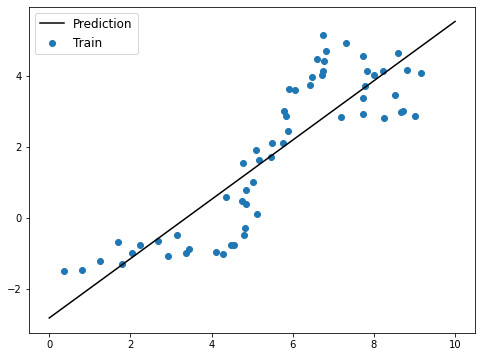

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(xs, ys, color="black", label="Prediction")
ax.scatter(Xtr, Ytr, label="Train")
ax.legend(fontsize="12")
plt.show()

### b) print the linear regression coefficients and verify they match the plot

In [6]:
print("The linear regression coefficients are", lr.theta)

The linear regression coefficients are [[-2.82765049  0.83606916]]


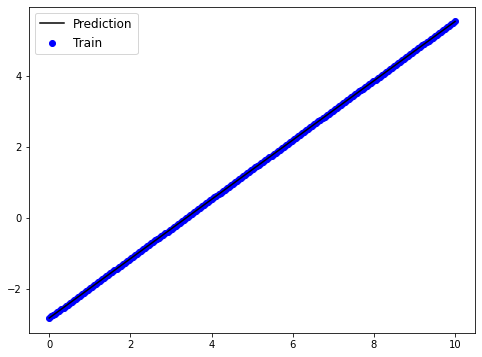

In [7]:
verfig, verax = plt.subplots(1, 1, figsize=(8, 6))
verax.plot(xs, ys, color="black", label="Prediction")
x_vals = np.linspace(0,10,200)
y_vals = lr.theta[0][0] + lr.theta[0][1] * x_vals
verax.scatter(x_vals, y_vals, color="blue", label="Train")
verax.legend(fontsize="12")
plt.show()

The points, when plotted using the y = mx + b formula, fall on the same line as the Linear Regression model.

### c) mean squared error of the predictions on the training and test set

In [8]:
print("Mean Squared Error of the training set:")
print(lr.mse(Xtr, Ytr))
print("Mean Squared Error of the test set:")
print(lr.mse(Xte, Yte))

Mean Squared Error of the training set:
1.127711955609391
Mean Squared Error of the test set:
2.242349203010125


## 1.3

Try fitting y = f(x) using a polynomial function f(x) of increasing order. Do this by adding additional polynomial features before constructing and training the linear regression object.
- plot their learned prediction functions f(x)
- plot their training and test errors on a log scale (semilogy) as a function of the degree.
- What polynomial degree do you recommend?

### a) plot the functions

Prediction function of degree 1


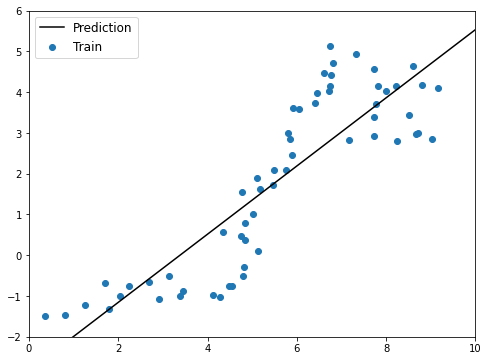

Prediction function of degree 3


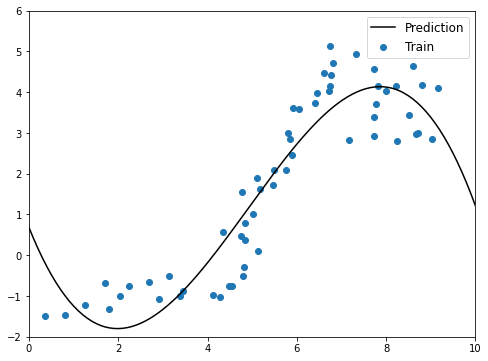

Prediction function of degree 5


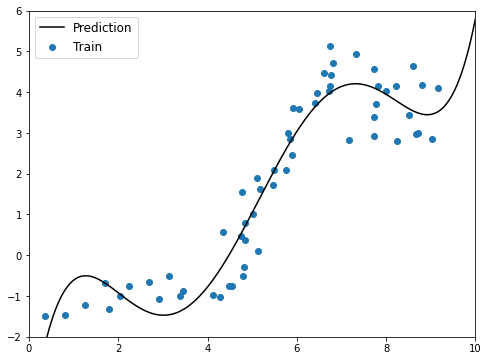

Prediction function of degree 7


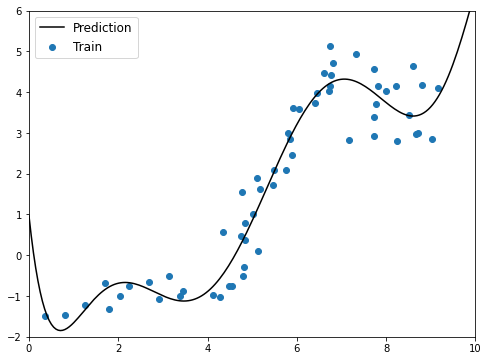

Prediction function of degree 10


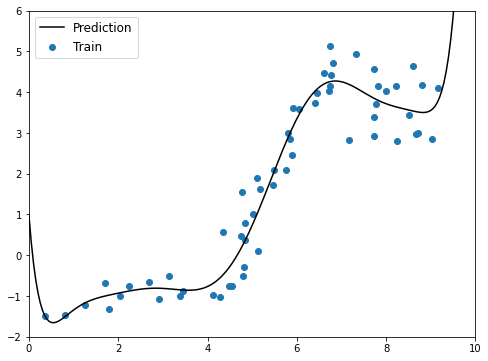

Prediction function of degree 18


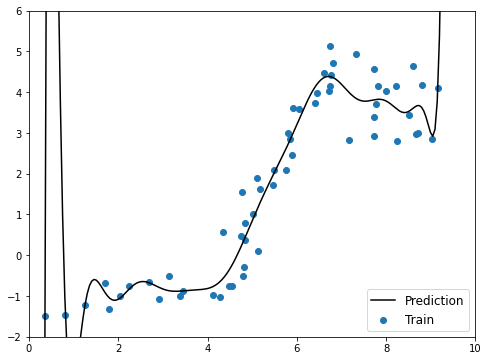

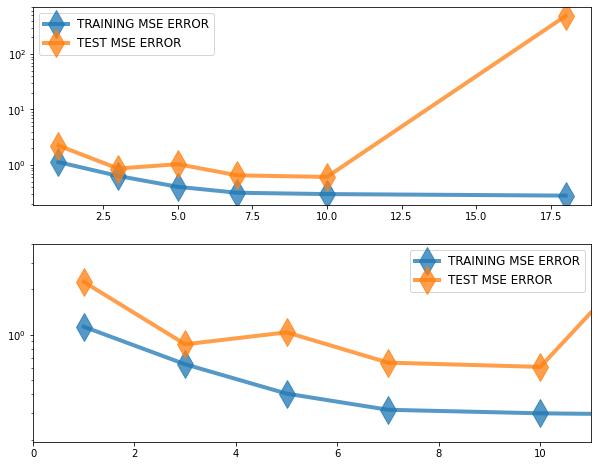

In [9]:
degrees = np.array([1, 3, 5, 7, 10, 18])
mse_error_tr = np.zeros(degrees.shape[0])
mse_error_te = np.zeros(degrees.shape[0])

for i, degree in enumerate(degrees):
    print("Prediction function of degree", degree)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False) # transform training data
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP = ml.transforms.fpoly(Xte, degree, bias=False) # transform test data
    XteP,_ = ml.transforms.rescale(XteP, params)
    
    lr = ml.linear.linearRegress(XtrP, Ytr) # create and train model
    mse_error_tr[i] = lr.mse(XtrP, Ytr)
    mse_error_te[i] = lr.mse(XteP, Yte)
    
    
    # plot the regression
    xs = np.linspace(0,10,200) # densely sample possible x-values
    xs = np.atleast_2d(xs).T
    xsP = ml.transforms.fpoly(xs, degree, bias=False)
    xsP,_ = ml.transforms.rescale(xsP, params)
    ys = lr.predict(xsP) # make predictions at xs
    # plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(xs, ys, color="black", label="Prediction")
    ax.scatter(Xtr, Ytr, label="Train")
    ax.set_xlim(0, 10)
    ax.set_ylim(-2, 6)
    ax.legend(fontsize="12")
    plt.show()

f, errax = plt.subplots(2, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
errax[0].semilogy(degrees, mse_error_tr, lw=4, marker='d', markersize=20, alpha=0.75,label='TRAINING MSE ERROR')
errax[0].semilogy(degrees, mse_error_te, lw=4, marker='d', markersize=20, alpha=0.75,label='TEST MSE ERROR')
errax[0].legend(fontsize=12)

errax[1].semilogy(degrees, mse_error_tr, lw=4, marker='d', markersize=20, alpha=0.75,label='TRAINING MSE ERROR')
errax[1].semilogy(degrees, mse_error_te, lw=4, marker='d', markersize=20, alpha=0.75,label='TEST MSE ERROR')
errax[1].legend(fontsize=12)
errax[1].set_xlim(0, 11)
errax[1].set_ylim(top=4)
plt.show()

### c) which polynomial degree is best?

I think that the best polynomial degree is 10, because it looks like it has the lowest test error, and the training error is also relatively low.

# Problem 2: Cross-Validation

## 2.1

Plot the five-fold cross-validation error and test error (with semilogy, as before) as a function of degree.

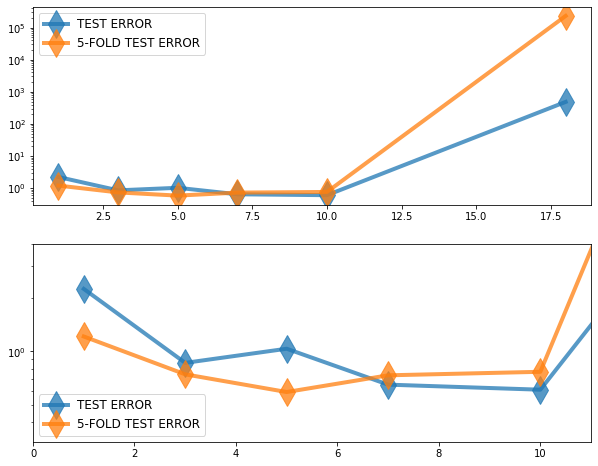

In [10]:
degrees = np.array([1, 3, 5, 7, 10, 18])
te_err = np.zeros(degrees.shape[0])

for i, degree in enumerate(degrees):
    nFolds = 5;
    testerr = np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
        
        XtrP = ml.transforms.fpoly(Xti, degree, bias=False) # transform training data
        XtrP,params = ml.transforms.rescale(XtrP)
        XteP = ml.transforms.fpoly(Xvi, degree, bias=False) # transform test data
        XteP,_ = ml.transforms.rescale(XteP, params)
        
        learner = ml.linear.linearRegress(XtrP, Yti)
        testerr[iFold] = learner.mse(XteP, Yvi)
    # the overall estimated validation error is the average of the error on each fold
    te_err[i] = np.mean(testerr)

f, folderr = plt.subplots(2, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
folderr[0].semilogy(degrees, mse_error_te, lw=4, marker='d', markersize=20, alpha=0.75,label='TEST ERROR')
folderr[0].semilogy(degrees, te_err, lw=4, marker='d', markersize=20, alpha=0.75,label='5-FOLD TEST ERROR')
folderr[0].legend(fontsize=12)
folderr[1].semilogy(degrees, mse_error_te, lw=4, marker='d', markersize=20, alpha=0.75,label='TEST ERROR')
folderr[1].semilogy(degrees, te_err, lw=4, marker='d', markersize=20, alpha=0.75,label='5-FOLD TEST ERROR')
folderr[1].set_xlim(0, 11)
folderr[1].set_ylim(top=4)
folderr[1].legend(fontsize=12)
plt.show()

## 2.2

The MSE errors of the actual test data are higher than the MSE estimates for the five-fold cross-validation for smaller degrees 1, 3, and 5. The difference appears to be a little bigger than 1. Interestingly, at degree 7, the five-fold cross-validation error is larger than the test error. <br>
Though the test error seems to indicate that degree 10 is the best, the five-fold cross-validation error indicates that degree 5 is probably best, as it has the smallest value.
In general errors are high for degree 18, which is likely caused by overfitting

## 2.3

I think I would recommend degree 5. Comparing the values, it looks like degree 5 has the lowest error of all the degrees.

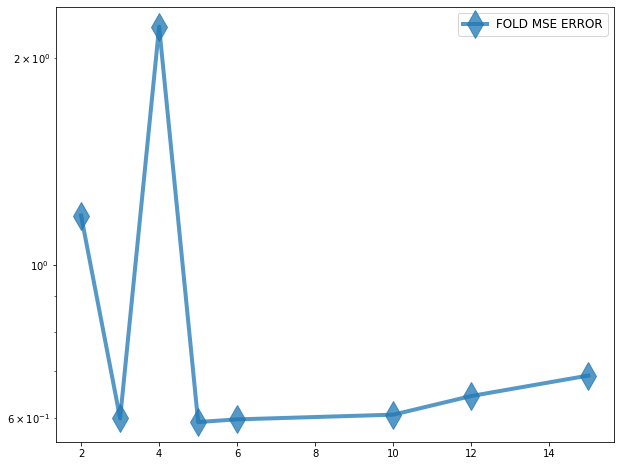

In [11]:
degree = 5
folds = np.array([2, 3, 4, 5, 6, 10, 12, 15])
te_err = np.zeros(folds.shape[0])

for i, fold in enumerate(folds):
    testerr = np.zeros(fold)
    for iFold in range(fold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,fold,iFold) # use ith block as validation
        
        XtrP = ml.transforms.fpoly(Xti, degree, bias=False) # transform training data
        XtrP,params = ml.transforms.rescale(XtrP)
        XteP = ml.transforms.fpoly(Xvi, degree, bias=False) # transform test data
        XteP,_ = ml.transforms.rescale(XteP, params)
        
        deg5learner = ml.linear.linearRegress(XtrP, Yti)
        testerr[iFold] = deg5learner.mse(XteP, Yvi)
    # the overall estimated validation error is the average of the error on each fold
    te_err[i] = np.mean(testerr)

f, errax = plt.subplots(1, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
errax.semilogy(folds, te_err, lw=4, marker='d', markersize=20, alpha=0.75,label='FOLD MSE ERROR')
errax.legend(fontsize=12)
plt.show()

## 2.4

The error varies widely for folds 2, 3, and 4, and then steadily grows from 5 to 15. <br>

I think the best way that I can explain it is that a smaller number of folds means that we have smaller groups of data that we train a model on. These smaller groups create a more biased model because there is less data used for training the model and more data used for testing. With less data used for training, a model may not pick up on important patterns, espeically if the data points are not well chosen. I think this is reflected in the smaller folds: for fold 2 and 4 the model appeared to have very high error while for fold 3 the model has pretty low error. I think this could be because the fold the data points were split into had good training and test points for fold 3, while for folds 2 and 4 the training and test sets were worse. <br>

Meanwhile, for the larger folds the error produced is rather low and slowly increases. I think this is because the 5 fold CV still had a rather large portion of data points for testing, which resulted in a rather representative portion of the data acting as the testing data set; because of this, the error produced would be lower and less variable. As the number of folds increases, the number of points reserved for testing decreases, which makes the resulting error more variable. I think this is because as the test sets decrease in size, the error is based on smaller and smaller groups of data which may be an issue if, for example, one of the folds manages to choose really bad data points as a test set. I think the increases in error starting from fold 5 is a result of averaging an increasingly large set of errors with higher and higher variability.

# Statement of Collaboration

I did not collaborate with anyone else on this assignment.